# Association Rules

## 1. Import Libraries and Utilities

In [1]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import ast
import matplotlib.pyplot as plt

In [2]:
# Import utilities
from utils import *

## 2. Import Datasets

Import datast with customers' information and clusters.

In [3]:
# Import dataset
cust_info = data_load('.\\cust_data_clusters.csv')

# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

cust_info

,customer_name,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,cust_per_card,total_lifetime_spend,number_dependents,cluster_meanshift,cluster_meanshift_nb,cluster_kmeans,cluster_kmeans_nb,cluster_bisect_kmeans,cluster_single,cluster_ward
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,Sara Moscowitz,1999-09-10 15:11:00,0,0,0,2,91.0,20.0,22,22.0,...,0,1545.0,0,0,0,1,6,6,0,0
19330,Donald Robertson,1981-06-26 22:58:00,1,0,0,2,197.0,5958.0,21,20.0,...,0,10219.0,1,0,0,4,1,5,4,5
2272,Phd. Felicia Bradshaw,1987-01-31 09:08:00,1,1,0,20,397.0,20.0,9,310.0,...,0,1753.0,2,0,0,0,3,1,1,4
25288,Emma Williams,1942-06-17 00:02:00,3,4,1,2,5282.0,237.0,12,499.0,...,0,11195.0,7,0,0,2,2,3,0,1
12829,Hilda Huerta,1999-01-01 00:00:00,0,0,0,2,82.0,22.0,21,9.0,...,0,1370.0,0,0,0,1,6,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Phd. Karen Watts,1974-11-01 05:26:00,0,0,1,2,209.0,5474.0,20,18.0,...,1,9730.0,0,0,0,4,1,5,4,5
26447,Curtis Thompson,1986-02-21 11:27:00,0,0,0,3,185.0,1066.0,15,267.0,...,0,2416.0,0,0,0,1,6,6,0,0
182,Richard Carter,2000-01-01 00:00:00,0,0,0,2,83.0,23.0,23,23.0,...,1,1491.0,0,0,0,1,6,6,0,0


Import dataset with the list of invoices per customers with the list of goods.

In [4]:
# Import dataset
basket = data_load('.\\Data\\Customer Basket Dataset.csv')
basket.head()

,customer_id,invoice_id,list_of_goods
0,7980,6494405,"['fresh bread', 'cake', 'grated cheese', 'fren..."
1,9995,6855482,"['bramble', 'beer', 'white wine', 'almonds', '..."
2,10060,3614116,"['fromage blanc', 'olive oil', 'tomato sauce',..."
3,1461,6464656,"['pokemon shield', 'white wine', 'google table..."
4,7830,10330249,"['olive oil', 'deodorant', 'whole weat flour',..."


## 3. Association Rules

Convert format of list of goods to apply association rules.

In [5]:
# Create list of lists
list_of_goods = [ast.literal_eval(product) for product in basket["list_of_goods"].values]
list_of_goods

[['fresh bread',
  'cake',
  'grated cheese',
  'french fries',
  'whole wheat pasta',
  'candy bars',
  'beats headphones',
  'half-life 2',
  'phone car charger',
  'cream',
  'cereals',
  'babies food'],
 ['bramble',
  'beer',
  'white wine',
  'almonds',
  'half-life: alyx',
  'cauliflower',
  'cider',
  'yogurt cake',
  'champagne',
  'chili',
  'soda',
  'black beer',
  'catfish'],
 ['fromage blanc',
  'olive oil',
  'tomato sauce',
  'avocado',
  'megaman zero 2',
  'cooking oil',
  'iPad',
  'shampoo',
  'oil',
  'green tea'],
 ['pokemon shield',
  'white wine',
  'google tablet',
  'canned_tuna',
  'green beans',
  'bacon',
  'cider',
  'pokemon sword',
  'beats headphones',
  'airpods',
  'phone charger',
  'metroid prime'],
 ['olive oil',
  'deodorant',
  'whole weat flour',
  'chutney',
  'escalope',
  'gums',
  'rice',
  'airpods',
  'oil',
  'cookies',
  'muffins',
  'laptop'],
 ['ratchet & clank 2',
  'megaman zero',
  'eggplant',
  'body spray',
  'barbecue sauce',
  's

Encoding our data.

In [6]:
# Encoding our data
te = TransactionEncoder()
te_fit = te.fit(list_of_goods).transform(list_of_goods)
transactions_items = pd.DataFrame(te_fit, columns=te.columns_)

In [7]:
# Viewing our transactions_items
transactions_items.head(10)

,airpods,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,beats headphones,beer,...,vacuum cleaner,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Run 'apriori' algorithm.

In [8]:
# Using 5% as minimum support and obtaining frequent_itemsets_grocery
# In real life scenario, support is typically a value between 3% to 8%, depending
# on the dataset
frequent_itemsets_grocery = apriori(
    transactions_items, min_support=0.05, use_colnames=True
    )

In [9]:
frequent_itemsets_grocery.sort_values(by='support', ascending=False)

,support,itemsets
35,0.466850,(oil)
14,0.463350,(cooking oil)
6,0.362925,(cake)
7,0.298650,(candy bars)
101,0.297438,"(cooking oil, oil)"
...,...,...
150,0.050438,"(candy bars, napkins, oil)"
4,0.050412,(burgers)
127,0.050400,"(tomatoes, carrots, asparagus)"
123,0.050400,"(oil, spaghetti)"


Produce association rules.

In [10]:
# We'll use a confidence level of 20%
rules_grocery = association_rules(frequent_itemsets_grocery, 
                                  metric="confidence", 
                                  min_threshold=0.2)
# Calculate total number of items in each rule
rules_grocery['total_goods'] = rules_grocery['antecedents'].str.len() + rules_grocery['consequents'].str.len()

In [11]:
rules_grocery

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,total_goods
0,(carrots),(asparagus),0.106175,0.146250,0.059650,0.561808,3.841425,0.044122,1.948348,2
1,(asparagus),(carrots),0.146250,0.106175,0.059650,0.407863,3.841425,0.044122,1.509491,2
2,(tomatoes),(asparagus),0.132288,0.146250,0.079062,0.597657,4.086541,0.059715,2.121944,2
3,(asparagus),(tomatoes),0.146250,0.132288,0.079062,0.540598,4.086541,0.059715,1.888788,2
4,(cake),(babies food),0.362925,0.248087,0.122963,0.338810,1.365686,0.032925,1.137210,2
...,...,...,...,...,...,...,...,...,...,...
269,"(cake, cooking oil)","(gums, oil)",0.227887,0.159925,0.053988,0.236904,1.481345,0.017543,1.100877,4
270,"(cake, oil)","(gums, cooking oil)",0.229513,0.157612,0.053988,0.235227,1.492438,0.017813,1.101487,4
271,"(gums, cooking oil)","(cake, oil)",0.157612,0.229513,0.053988,0.342533,1.492438,0.017813,1.171903,4
272,"(gums, oil)","(cake, cooking oil)",0.159925,0.227887,0.053988,0.337580,1.481345,0.017543,1.165594,4


## 4. Association rules by cluster

Join `cust_info` and `basket` datasets based on `customer_id`.

In [12]:
# Join datasets
cust_clust = basket.join(cust_info, on='customer_id')
cust_clust

,customer_id,invoice_id,list_of_goods,customer_name,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,cust_per_card,total_lifetime_spend,number_dependents,cluster_meanshift,cluster_meanshift_nb,cluster_kmeans,cluster_kmeans_nb,cluster_bisect_kmeans,cluster_single,cluster_ward
0,7980,6494405,"['fresh bread', 'cake', 'grated cheese', 'fren...",Phd. Elizabeth Skinner,1988-01-01 00:00:00,5.0,2.0,1.0,3.0,4880.0,...,1.0,10824.0,7.0,0.0,0.0,2.0,2.0,3.0,0.0,1.0
1,9995,6855482,"['bramble', 'beer', 'white wine', 'almonds', '...",Sandra Galindo,1941-08-11 03:38:00,0.0,1.0,0.0,2.0,1509.0,...,0.0,3544.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
2,10060,3614116,"['fromage blanc', 'olive oil', 'tomato sauce',...",Phd. Timothy Dalrymple,1990-01-01 00:00:00,0.0,0.0,0.0,5.0,6955.0,...,0.0,11648.0,0.0,0.0,0.0,1.0,6.0,6.0,0.0,0.0
3,1461,6464656,"['pokemon shield', 'white wine', 'google table...",Msc. Donald Farrell,1980-04-06 17:12:00,0.0,0.0,0.0,2.0,181.0,...,1.0,9227.0,0.0,0.0,0.0,4.0,1.0,5.0,4.0,5.0
4,7830,10330249,"['olive oil', 'deodorant', 'whole weat flour',...",Brain Morris,1940-01-07 11:43:00,1.0,1.0,1.0,20.0,499.0,...,0.0,1700.0,2.0,0.0,0.0,0.0,3.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,360,11470275,"['tomatoes', 'ham', 'zucchini', 'frozen vegeta...",Bsc. Anna Dubard,1984-02-24 22:21:00,1.0,1.0,0.0,2.0,1146.0,...,1.0,2909.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0
79996,3116,7483644,"['pet food', 'soup', 'beer', 'fromage blanc', ...",Msc. Cathryn Farrell,1995-07-11 11:58:00,0.0,0.0,0.0,3.0,6950.0,...,1.0,11200.0,0.0,0.0,0.0,1.0,6.0,6.0,0.0,0.0
79997,1546,9168204,"['cake', 'french fries', 'cooking oil', 'muffi...",Bsc. Hilda Plescia,1946-04-18 19:42:00,0.0,0.0,1.0,3.0,5019.0,...,1.0,10719.0,0.0,0.0,0.0,1.0,6.0,4.0,0.0,1.0
79998,7242,5054623,"['fromage blanc', 'napkins', 'sandwich', 'hone...",Bsc. Nicholas Barajas,1948-06-19 13:36:00,1.0,0.0,1.0,8.0,15549.0,...,1.0,21688.0,1.0,0.0,0.0,3.0,4.0,4.0,0.0,3.0


### Cluster 0 - Thrifty

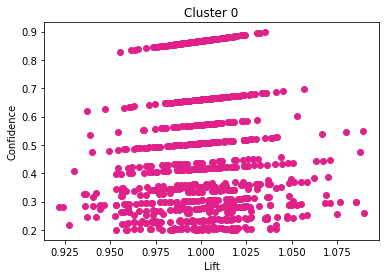

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,total_goods
95,(cooking oil),(oil),0.660216,0.867222,0.571301,0.865324,0.997811,-0.001253,0.985903,2
96,(oil),(cooking oil),0.867222,0.660216,0.571301,0.658771,0.997811,-0.001253,0.995764,2
32,(cake),(oil),0.505805,0.867222,0.437531,0.865019,0.997459,-0.001115,0.983674,2
33,(oil),(cake),0.867222,0.505805,0.437531,0.504520,0.997459,-0.001115,0.997406,2
63,(oil),(candy bars),0.867222,0.415898,0.362013,0.417439,1.003706,0.001337,1.002646,2
62,(candy bars),(oil),0.415898,0.867222,0.362013,0.870437,1.003706,0.001337,1.024808,2
15,(cake),(cooking oil),0.505805,0.660216,0.335219,0.662743,1.003827,0.001278,1.007491,2
16,(cooking oil),(cake),0.660216,0.505805,0.335219,0.507741,1.003827,0.001278,1.003932,2
140,(oil),(gums),0.867222,0.350402,0.303860,0.350383,0.999947,-0.000016,0.999971,2
139,(gums),(oil),0.350402,0.867222,0.303860,0.867176,0.999947,-0.000016,0.999654,2


In [13]:
rules_grocery_0 = rules_cluster(cust_clust, 0)
rules_grocery_0.sort_values(by='support', ascending=False).head(20)

### Cluster 1 - Young and Unattached Customers

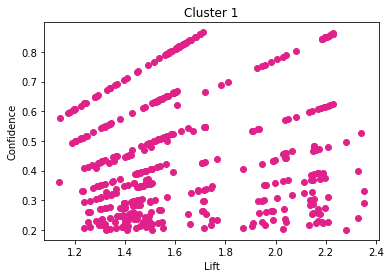

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,total_goods
91,(oil),(cooking oil),0.506531,0.415766,0.319035,0.629843,1.514897,0.108436,1.578341,2
90,(cooking oil),(oil),0.415766,0.506531,0.319035,0.767342,1.514897,0.108436,2.121006,2
38,(oil),(cake),0.506531,0.329709,0.248757,0.491099,1.489494,0.081749,1.317136,2
37,(cake),(oil),0.329709,0.506531,0.248757,0.754474,1.489494,0.081749,2.009847,2
74,(cider),(white wine),0.279719,0.386395,0.224955,0.804219,2.081338,0.116873,3.134138,2
75,(white wine),(cider),0.386395,0.279719,0.224955,0.582189,2.081338,0.116873,1.723942,2
56,(oil),(candy bars),0.506531,0.269774,0.198369,0.391623,1.451671,0.061720,1.200286,2
55,(candy bars),(oil),0.269774,0.506531,0.198369,0.735316,1.451671,0.061720,1.864371,2
26,(cake),(cooking oil),0.329709,0.415766,0.195717,0.593605,1.427739,0.058635,1.437603,2
27,(cooking oil),(cake),0.415766,0.329709,0.195717,0.470738,1.427739,0.058635,1.266464,2


In [14]:
rules_grocery_1 = rules_cluster(cust_clust, 1)
rules_grocery_1.sort_values(by='support', ascending=False).head(20)

### Cluster 2 - Parents

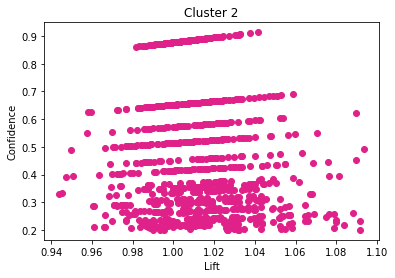

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,total_goods
13,(cooking oil),(babies food),0.651758,0.877372,0.572462,0.878334,1.001097,0.000627,1.007908,2
14,(babies food),(cooking oil),0.877372,0.651758,0.572462,0.652473,1.001097,0.000627,1.002057,2
5,(cake),(babies food),0.514267,0.877372,0.450630,0.876258,0.998730,-0.000573,0.990996,2
6,(babies food),(cake),0.877372,0.514267,0.450630,0.513614,0.998730,-0.000573,0.998657,2
7,(candy bars),(babies food),0.414399,0.877372,0.366556,0.884548,1.008178,0.002973,1.062150,2
8,(babies food),(candy bars),0.877372,0.414399,0.366556,0.417789,1.008178,0.002973,1.005821,2
63,(cake),(cooking oil),0.514267,0.651758,0.334373,0.650194,0.997599,-0.000805,0.995526,2
64,(cooking oil),(cake),0.651758,0.514267,0.334373,0.513032,0.997599,-0.000805,0.997464,2
25,(gums),(babies food),0.351161,0.877372,0.309423,0.881141,1.004296,0.001324,1.031711,2
26,(babies food),(gums),0.877372,0.351161,0.309423,0.352670,1.004296,0.001324,1.002330,2


In [15]:
rules_grocery_2 = rules_cluster(cust_clust, 2)
rules_grocery_2.sort_values(by='support', ascending=False).head(20)

### Cluster 3 - Meat and Alcohol Connoisseurs

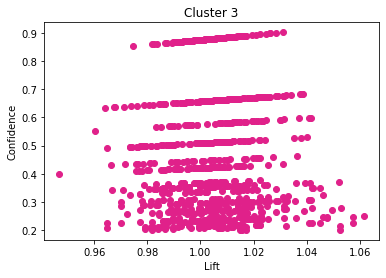

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,total_goods
92,(cooking oil),(oil),0.656904,0.875491,0.575009,0.875331,0.999817,-0.000105,0.998718,2
93,(oil),(cooking oil),0.875491,0.656904,0.575009,0.656784,0.999817,-0.000105,0.999651,2
27,(cake),(oil),0.508329,0.875491,0.445627,0.876651,1.001325,0.000589,1.009401,2
28,(oil),(cake),0.875491,0.508329,0.445627,0.509002,1.001325,0.000589,1.001371,2
57,(oil),(candy bars),0.875491,0.420516,0.367958,0.420287,0.999456,-0.000200,0.999605,2
56,(candy bars),(oil),0.420516,0.875491,0.367958,0.875015,0.999456,-0.000200,0.996190,2
12,(cake),(cooking oil),0.508329,0.656904,0.335090,0.659200,1.003495,0.001167,1.006736,2
13,(cooking oil),(cake),0.656904,0.508329,0.335090,0.510105,1.003495,0.001167,1.003626,2
137,(gums),(oil),0.352593,0.875491,0.309333,0.877309,1.002077,0.000641,1.014820,2
138,(oil),(gums),0.875491,0.352593,0.309333,0.353325,1.002077,0.000641,1.001132,2


In [16]:
rules_grocery_3 = rules_cluster(cust_clust, 3)
rules_grocery_3.sort_values(by='support', ascending=False).head(20)

### Cluster 4 - TechSip Gamers

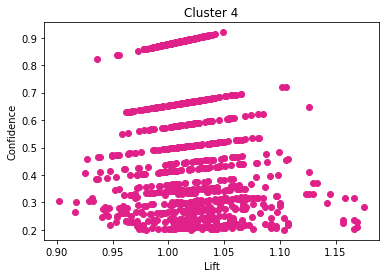

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,total_goods
144,(pokemon sword),(pokemon shield),0.876895,0.652953,0.574594,0.655260,1.003533,0.002023,1.006692,2
143,(pokemon shield),(pokemon sword),0.652953,0.876895,0.574594,0.879994,1.003533,0.002023,1.025817,2
158,(pokemon violet),(pokemon sword),0.496130,0.876895,0.438766,0.884377,1.008532,0.003712,1.064707,2
159,(pokemon sword),(pokemon violet),0.876895,0.496130,0.438766,0.500363,1.008532,0.003712,1.008472,2
131,(pokemon scarlet),(pokemon sword),0.412470,0.876895,0.364224,0.883033,1.007000,0.002532,1.052477,2
132,(pokemon sword),(pokemon scarlet),0.876895,0.412470,0.364224,0.415357,1.007000,0.002532,1.004938,2
146,(pokemon violet),(pokemon shield),0.496130,0.652953,0.327325,0.659756,1.010419,0.003375,1.019995,2
145,(pokemon shield),(pokemon violet),0.652953,0.496130,0.327325,0.501299,1.010419,0.003375,1.010366,2
172,(pokemon sword),(white wine),0.876895,0.340261,0.299544,0.341596,1.003924,0.001171,1.002028,2
173,(white wine),(pokemon sword),0.340261,0.876895,0.299544,0.880337,1.003924,0.001171,1.028757,2


In [17]:
rules_grocery_4 = rules_cluster(cust_clust, 4)
rules_grocery_4.sort_values(by='support', ascending=False).head(20)

### Cluster 5 - Fish Enthusiasts

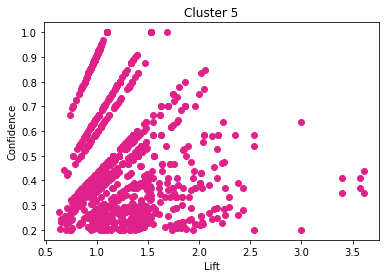

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,total_goods
105,(cooking oil),(oil),0.654545,0.909091,0.593939,0.907407,0.998148,-0.001102,0.981818,2
106,(oil),(cooking oil),0.909091,0.654545,0.593939,0.653333,0.998148,-0.001102,0.996503,2
70,(candy bars),(oil),0.412121,0.909091,0.375758,0.911765,1.002941,0.001102,1.030303,2
71,(oil),(candy bars),0.909091,0.412121,0.375758,0.413333,1.002941,0.001102,1.002066,2
41,(cake),(oil),0.430303,0.909091,0.375758,0.873239,0.960563,-0.015427,0.717172,2
42,(oil),(cake),0.909091,0.430303,0.375758,0.413333,0.960563,-0.015427,0.971074,2
152,(oil),(gums),0.909091,0.357576,0.321212,0.353333,0.988136,-0.003857,0.993440,2
151,(gums),(oil),0.357576,0.909091,0.321212,0.898305,0.988136,-0.003857,0.893939,2
55,(candy bars),(cooking oil),0.412121,0.654545,0.272727,0.661765,1.011029,0.002975,1.021344,2
56,(cooking oil),(candy bars),0.654545,0.412121,0.272727,0.416667,1.011029,0.002975,1.007792,2


In [18]:
rules_grocery_5 = rules_cluster(cust_clust, 5)
rules_grocery_5.sort_values(by='support', ascending=False).head(20)

### Cluster 6 - Minimalist Green Shoppers

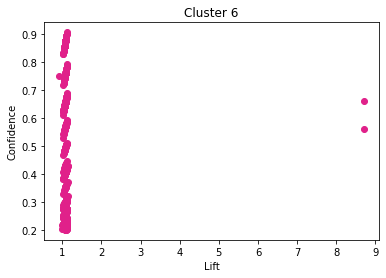

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,total_goods
36,(asparagus),(tomatoes),0.700736,0.808610,0.609465,0.869750,1.075612,0.042843,1.469408,2
35,(tomatoes),(asparagus),0.808610,0.700736,0.609465,0.753719,1.075612,0.042843,1.215135,2
78,(tomatoes),(carrots),0.808610,0.605985,0.525850,0.650314,1.073151,0.035844,1.126766,2
79,(carrots),(tomatoes),0.605985,0.808610,0.525850,0.867760,1.073151,0.035844,1.447297,2
4,(carrots),(asparagus),0.605985,0.700736,0.456651,0.753568,1.075396,0.032016,1.214391,2
5,(asparagus),(carrots),0.700736,0.605985,0.456651,0.651674,1.075396,0.032016,1.131167,2
229,(asparagus),"(tomatoes, carrots)",0.700736,0.525850,0.399085,0.569523,1.083053,0.030603,1.101453,3
225,"(tomatoes, asparagus)",(carrots),0.609465,0.605985,0.399085,0.654812,1.080575,0.029758,1.141451,3
226,"(carrots, asparagus)",(tomatoes),0.456651,0.808610,0.399085,0.873939,1.080791,0.029832,1.518228,3
224,"(tomatoes, carrots)",(asparagus),0.525850,0.700736,0.399085,0.758934,1.083053,0.030603,1.241419,3


In [19]:
rules_grocery_6 = rules_cluster(cust_clust, 6)
rules_grocery_6.sort_values(by='support', ascending=False).head(20)